# **Machine Learning for Biology: Learning the Language of Life**

<!-- <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/181-CascadeAndCRISPR_1vy8.tiff/lossy-page1-800px-181-CascadeAndCRISPR_1vy8.tiff.jpg" width="60%" /> -->


<a href="https://colab.research.google.com/drive/1VN9IKrJlYoxK0gHk4zSdLdw6NHoYFfiM?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2023. Apache License 2.0.

**Authors:**
- Tom Makkink
- Kevin Michael Eloff
- Natasha Latysheva
- Kyle Taylor

**Reviewers:**

**Introduction:**

[Intro to the topic. Probably between 3-5 lines.]

**Topics:**

Content: [e.g. Reinforcement Learning, Computer Vision etc. Can be more than one.]
Level: [Beginner, Intermediate, Advanced.]

[Let's use the colours from notion here. E.g. <font color='grey'>`Beginner`</font> and <font color='blue'>`Generative Models`</font>.]


**Aims/Learning Objectives:**

[Points on the exact learning outcomes from the prac. This should probably be <=5 things.]

1. Learn the basics of proteins (e.g. what is a protein, what is it made of?)
2. Learning a general set of tool for working with proteins:
    1. How to use Pretrained LM Transformer from HuggingFace.
    2. Exploring and working with embeddings.
    3. How to leverage the Pretrained LM  and leverage them for specific tasks.
3. Application to another domain such as DNA

**Prerequisites:**

[Knowledge required for this prac. You can link a relevant parallel track session, blogs, papers, courses, topics etc.]

1. Basic ML knowledge and Python
2. No Bio required

**Outline:**

[Points that link to each section. Auto-generate following the instructions [here](https://stackoverflow.com/questions/67458990/how-to-automatically-generate-a-table-of-contents-in-colab-notebook).]

**Before you start:**

For this practical, you will need to use a GPU to speed up training. To do this, go to the "Runtime" menu in Colab, select "Change runtime type" and then in the popup menu, choose "GPU" in the "Hardware accelerator" box.

[Any other tasks just before starting.]

**Suggested experience level in this topic:**

| Level         | Experience                            |
| --- | --- |
`Beginner`      | It is my first time being introduced to this work. |
`Intermediate`  | I have done some basic courses/intros on this topic. |
`Advanced`      | I work in this area/topic daily. |

In [ ]:
# @title **Paths to follow:** What is your level of experience in the topics presented in this notebook? (Run Cell)
experience = "advanced" #@param ["beginner", "intermediate", "advanced"]

sections_to_follow=""

if experience == "beginner":
  sections_to_follow="Introduction -> 1.1 Subsection -> 2.1 Subsection -> Conclusion -> Feedback"
elif experience == "intermediate":
  sections_to_follow="Introduction -> 1.2 Subsection -> 2.2 Subsection -> Conclusion -> Feedback"
elif experience == "advanced":
  sections_to_follow="Introduction -> 1.3 Subsection -> 2.3 Subsection -> Conclusion -> Feedback"

print(f"Based on your experience, it is advised you follow these -- {sections_to_follow} sections. Note this is just a guideline.")

Based on your experience, it is advised you follow these -- Introduction -> 1.3 Subsection -> 2.3 Subsection -> Conclusion -> Feedback sections. Note this is just a guideline.


# **Practical outline**

!['Paths to Follow'](https://i.ibb.co/3hbXVCG/ML-for-bio-03.png" )



## Installation and Imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)
%%capture
!pip install -qU py3Dmol

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import flax.linen as nn
import optax
import tensorflow_datasets as tfds

In [ ]:
# @title Helper Functions. (Run Cell)

## **The Wonderous World of Biology**

*Imagine a flashy spaceship lands in your backyard. The door opens and you are invited to investigate everything to see what you can learn. The technology is clearly millions of years beyond what we can make.*

*This is biology.*

–Bert Hubert, “Our Amazing Immune System”

Welcome! In this practical we will give you a small taste of one of the most exciting applications of machine learning, Biology!

We will primarily be working on Proteins, which play an enormous number of critical roles in the body. From keeping you healthy through antibodies to digesting foods with enzymes such as amylase (found in saliva) and pepsin (in the stomach) proteins are essential to life.

Today we will be going through a fairly classic machine learning pipeline for dealing with proteins.

## **Introduction to Proteins**





### 1.1 What is a Protein? - <font color='blue'>`Beginner`</font>

Proteins are **large**, **complex molecules** that play many critical roles in the body. They are required for the structure, function, and regulation of the body's tissues and organs.

Proteins are molecules in 3D space, but they are made up of linear elements called **amino acids** or **residues**. For example, take the protein **insulin**, which is a relatively small protein of only 110 amino acids that is important for facilitating sugar uptake from the bloodstream into cells. It is formed of 2 separate chains of amino acids (shown in red and blue below) that are bound together.

Check out the 3D structure of insulin and its amino acid composition side-by-side:

<img src="https://media.istockphoto.com/id/1305764984/vector/human-insulin-molecule-it-is-peptide-hormone-produced-by-beta-cells-of-the-pancreas-used-for.jpg?s=612x612&w=0&k=20&c=Qc0_5oworuerOjOt6qHkaXI9Zd14FSxylasEjAc_O1c="/>


Each amino acid has its own physical structure and properties – for example, some amino acids are positively charged while others are negatively charged. These biophysical properties have repurcussions for the overall protein structure and functon.

Here is a list of all 20 amino acid building components that make up proteins:

<!-- ![](https://upload.wikimedia.org/wikipedia/commons/4/4e/Proteinogenic_Amino_Acid_Table.png) -->

![](https://i0.wp.com/www.compoundchem.com/wp-content/uploads/2014/09/20-Common-Amino-Acids-v3.png?ssl=1)

🥜 **In a nutshell**:
- Proteins are made up of **sequences of amino acids**, each of which have their own unique properities which influences the 3D shape.

### 1.2 Why are Proteins Important?



Proteins do most of their work in the cell and perform crucial functions in the body. They transport molecules from one place to another, form the structure of our cells, communicate signals within the cell and between cells, speed up chemical reactions, control cell growth and differentiation, and defend against foreign invaders.

These varying roles are a result of the diverse structures of proteins. Even a slight change in structure can render a protein nonfunctional.

### 1.3 Protein Structures






In general, proteins have four forms:

<img src="https://comis.med.uvm.edu/VIC/coursefiles/MD540/MD540-Protein_Organization_10400_574581210/Protein-org/structure.jpg"/>

1. **Primary structure**: sequence of amino acids that make up the protein, like **letters in a sentence**. For example, the sequence "AUGC" represents a protein made up of residues `A`, `U`, `G` and `C` in the same way that "HELLO" represents a word made up of letters `H`, `E`, `L` and `O`.


2. **Secondary structure**: local interactions between nearby residues cause specific sub-structures to form. Two common secondary structures are α-helices (coiled like a spring) and β-sheets (folded like an accordion).

<img src="https://www.creative-proteomics.com/pronalyse/images/1-4-1-Secondary-Structure-Analysis_Fig1.jpg"/>


3. **Tertiary structure**: the full, three-dimensional shape of a single protein chain. This structure is the result of distant amino acids interacting and folding together.

4. **Quaternary**: proteins made up of multiple polypeptide chains, or subunits, coming together like pieces of a puzzle. These subunits can be identical or different.


**Group Task:**

Execute the cell below which visualise a protein structure of a **plastic-eating Enzyme** PETase. In particular, look for distinct secondary structures, such as α-helices or β-sheets.

In [ ]:
import py3Dmol
import requests

def fetch_pdb(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    return response.text

pdb = fetch_pdb("5xh3")

pdbview = py3Dmol.view()
pdbview.addModel(pdb, "pdb")
pdbview.setStyle({"cartoon": {"color": "spectrum"}})
pdbview.setBackgroundColor("white")
pdbview.zoomTo()
pdbview.zoom(2, 800)
pdbview.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Remember that proteins are not fixed in the cell, but rather extrememly dynamic. The gif below shows the molecular choas in each and every cell, with proteins constantly jittering and moving around.

![ScratchyLastBlowfish](https://thumbs.gfycat.com/ScratchyLastBlowfish-size_restricted.gif)

*Source: [Inner Life of a Cell | Protein Packing Animation](https://www.youtube.com/watch?v=uHeTQLNFTgU)*

### 1.4 Machine Learning and Proteins

In the realm of machine learning, proteins present an interesting challenge. The wide range of structures and functions of proteins offers a vast playground for prediction tasks. Proteins can be represented in various ways (e.g., sequences, structures) which can be used to train machine learning models for tasks such as:

* **Protein Classification**: Classifying proteins into their respective families
 based on their amino acid sequences.

* **Protein Structure Prediction**: Predicting the 3D structure of a protein from its amino acid sequence (e.g. AlphaFold 2).

* **Protein Function Prediction**: Predicting the function of a protein based on its sequence or structure.

* **Protein-Protein Interaction Prediction**: Predicting how proteins will interact with each other.

🥜 **In a nutshell**:
- Proteins are super important for tons of different things in the body. We can use machine learning to learn more about them!
- Proteins are made up of many building blocks which together form complex structures.
- Proteins are dynaic and constantly shifting around in the body.

## **Representation of Proteins**

Generally, we know the protein sequence of all human proteins – you can look these up in databases such as Uniprot. In the case of insulin, its amino acid sequence is the following (this is actually the precusor protein that will get processed into 2 separate protein chains later):

In [ ]:
insulin_sequence = (
    'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGG'
    'GPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'
)

In [ ]:
print(f'The length of the insulin protein precursor is {len(insulin_sequence)}.')

The length of the insulin protein precursor is 110.


Now we have a **sequence representation** of a protein. But since machine learning deals with numerical data, how can we represent this sequence in a numerical form?

### 2.1 One-hot encoding of a protein sequence.

The simplest way to represent a protein sequence is using a **one-hot encoding**. Here is how it works:
- Since there are 21 possible amino acids, each amino acid must be one of these 21 options.
- We can therefore represent each amino acid as a binary vector that is all zeroes except for a single "1" in the position corresponding to that amino acid.

As a concrete example, imaginine we want to one-hot encode a small protein with just 5 amino acids, MALWN.

First, let's define the mapping between an amino acid letter code to an integer index:

In [ ]:
amino_acids = [
    'R', 'H','K', 'D', 'E',
    'S', 'T', 'N', 'Q', 'G',
    'P', 'C', 'U', 'A', 'V',
    'I', 'L', 'M', 'F', 'Y',
    'W']

amino_acid_to_index = {
    amino_acid: index for index, amino_acid in enumerate(amino_acids)
    }

amino_acid_to_index

{'R': 0,
 'H': 1,
 'K': 2,
 'D': 3,
 'E': 4,
 'S': 5,
 'T': 6,
 'N': 7,
 'Q': 8,
 'G': 9,
 'P': 10,
 'C': 11,
 'U': 12,
 'A': 13,
 'V': 14,
 'I': 15,
 'L': 16,
 'M': 17,
 'F': 18,
 'Y': 19,
 'W': 20}

Now, given a specific protein sequence, we can convert it to a sequence of integers:

In [ ]:
tiny_protein = ['M', 'A', 'L', 'W', 'M'] # methionine, alanine, leucine, tryptophan, methionine.

tiny_protein_indices = [
    amino_acid_to_index[amino_acid] for amino_acid in tiny_protein]

tiny_protein_indices

[17, 13, 16, 20, 17]

Finally, we can represent these indices using a one-hot encoding:
- For each of the 5 amino acids in the protein sequence, we will have an embedding/encoding vector of length 21.
- Each vector will be composed of 20 zeroes, with a single 1 in the position corresponding to that amino acid's integer index.

This concept is easier explained visually:


!['One hot encoding'](https://i.ibb.co/GMYvGRm/ML-for-bio-01-2.png)


In code, this is how we can get this embedding:

In [ ]:
one_hot_encoded_sequence = jax.nn.one_hot(
    x=tiny_protein_indices, num_classes=len(amino_acids)
  )

print(one_hot_encoded_sequence)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


So the encoding for the first amino acid "M" is:

In [ ]:
one_hot_encoded_sequence[0]

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0.], dtype=float32)

We can visualise the one-hot encoded matrix representing our tiny protein sequence "MALWN":

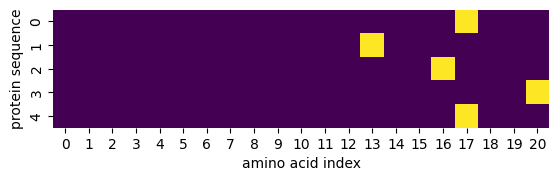

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.heatmap(
    one_hot_encoded_sequence, square=True, cbar=False, cmap='viridis')
fig.set(xlabel='amino acid index', ylabel='protein sequence')
plt.show()

Having this basic numerical representation of a protein sequence allows us to interact with proteins mathematically. Although a good starting point, at the moment this representation is too basic to be useful. Let's now examine **dense learned embeddings of amino acids**.

## 2.2 Learned embeddings of amino acids

Thoughout the rest of the practical, we will use a popular pre-trained transformer protein language model called **ESM** from Meta. We will discuss more about how the model works in a minute, but first, let's explore its representation of amino acids.

 The model is hosted on the Hugging Face 🤗 platform. In case you are not already familiar with Hugging Face, it is a really fantastic resource of thousands of pre-trained models that you can quickly load and get started with. To access the ESM2 protein language model, we first need to install the transformers library (ESM2 is a transformer-based model):

In [ ]:
# Kevin: Move this to installs? @Tom
! pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00


Now we can import the required modules, and load up the ESM2 tokenizer and model:

In [ ]:
from transformers import AutoTokenizer, EsmModel, EsmConfig

model_checkpoint = "facebook/esm2_t30_150M_UR50D"  # From: https://github.com/facebookresearch/esm#available-models-and-datasets-
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = EsmModel.from_pretrained(model_checkpoint)

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t30_150M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We can examine the mapping between tokens and indices that the ESM2 tokenizer uses:

In [ ]:
vocab_to_index = tokenizer.get_vocab()
vocab_to_index

{'<cls>': 0,
 '<pad>': 1,
 '<eos>': 2,
 '<unk>': 3,
 'L': 4,
 'A': 5,
 'G': 6,
 'V': 7,
 'S': 8,
 'E': 9,
 'R': 10,
 'T': 11,
 'I': 12,
 'D': 13,
 'P': 14,
 'K': 15,
 'Q': 16,
 'N': 17,
 'F': 18,
 'Y': 19,
 'M': 20,
 'H': 21,
 'W': 22,
 'C': 23,
 'X': 24,
 'B': 25,
 'U': 26,
 'Z': 27,
 'O': 28,
 '.': 29,
 '-': 30,
 '<null_1>': 31,
 '<mask>': 32}

You can see it's quite similar to the amino acid to integer mapping we made manually, but contains some additional tokens that are useful such as a token for an unknown amino acid (`unk`) and a token designating the end of the string (`eos` for 'end of sentence').

Let's use the tokenizer to encode our tiny protein sequence:

In [ ]:
tokenized_tiny_protein = tokenizer('MALWM')['input_ids']
tokenized_tiny_protein

[0, 20, 5, 4, 22, 20, 2]

We could choose to chop off the initial `cls` and final `eos` tokens if we wanted to:

In [ ]:
tokenized_tiny_protein[1:-1]

[20, 5, 4, 22, 20]

Let's extract the embeddings for each amino acid:

In [ ]:
token_embeddings = model.get_input_embeddings().weight.detach().numpy()
token_embeddings.shape

(33, 640)

You can see that for each of the 33 possible input tokens, we have a 640-dimensional embedding vector.

Although it's a bit tricky to visualise in 640 dimensions, we can use a dimensionality reduction technique such as tSNE to map this information down to 2 dimensions and plot where each token lies in this new 2 dimensional space:

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=123, perplexity=3)
embeddings_tsne = tsne.fit_transform(token_embeddings)
embeddings_tsne.shape

(33, 2)

Let's plot a scatter plot:

In [ ]:
import plotnine as gg

fig = (
    gg.ggplot(mapping=gg.aes(x=embeddings_tsne[:, 0],
                             y=embeddings_tsne[:, 1]))
  + gg.geom_point(size=4, alpha=0.9)
  + gg.theme(figure_size=(7, 4))
)
fig.draw();


To see if similar types of tokens and amino acids cluster together, we can label each token with its label, and replot the plot and colour by label:

In [ ]:
{x: 'a' for x in list(vocab_to_index.keys())}

{'<cls>': 'a',
 '<pad>': 'a',
 '<eos>': 'a',
 '<unk>': 'a',
 'L': 'a',
 'A': 'a',
 'G': 'a',
 'V': 'a',
 'S': 'a',
 'E': 'a',
 'R': 'a',
 'T': 'a',
 'I': 'a',
 'D': 'a',
 'P': 'a',
 'K': 'a',
 'Q': 'a',
 'N': 'a',
 'F': 'a',
 'Y': 'a',
 'M': 'a',
 'H': 'a',
 'W': 'a',
 'C': 'a',
 'X': 'a',
 'B': 'a',
 'U': 'a',
 'Z': 'a',
 'O': 'a',
 '.': 'a',
 '-': 'a',
 '<null_1>': 'a',
 '<mask>': 'a'}

In [ ]:
import pandas as pd

embeddings_tsne_df = pd.DataFrame(
    embeddings_tsne, columns=['first_dim', 'second_dim'])
embeddings_tsne_df['token'] = list(vocab_to_index.keys())

token_labels = {
    '<cls>': 'special_token',
    '<pad>': 'special_token',
    '<eos>': 'special_token',
    '<unk>': 'special_token',
    'L': 'hydrophobic',
    'A': 'hydrophobic',
    'G': 'special_amino_acid',
    'V': 'hydrophobic',
    'S': 'polar_uncharged',
    'E': 'negatively_charged',
    'R': 'positively_charged',
    'T': 'polar_uncharged',
    'I': 'hydrophobic',
    'D': 'negatively_charged',
    'P': 'special_amino_acid',
    'K': 'positively_charged',
    'Q': 'polar_uncharged',
    'N': 'polar_uncharged',
    'F': 'hydrophobic',
    'Y': 'hydrophobic',
    'M': 'hydrophobic',
    'H': 'positively_charged',
    'W': 'hydrophobic',
    'C': 'special_amino_acid',
    'X': 'special_amino_acid',
    'B': 'special_amino_acid',
    'U': 'special_amino_acid',
    'Z': 'special_amino_acid',
    'O': 'special_amino_acid',
    '.': 'special_token',
    '-': 'special_token',
    '<null_1>': 'special_token',
    '<mask>': 'special_token'
    }

embeddings_tsne_df['label'] = embeddings_tsne_df['token'].map(token_labels)

embeddings_tsne_df.head()

,first_dim,second_dim,token,label
0,84.252831,-151.931641,<cls>,special_token
1,-328.320160,26.773651,<pad>,special_token
2,98.762131,-182.481689,<eos>,special_token
3,-354.844238,39.576466,<unk>,special_token
4,49.348991,156.832977,L,hydrophobic


In [ ]:
# TODO: label the residues
fig = (gg.ggplot(
    mapping=gg.aes(x='first_dim', y='second_dim', fill='label'),
    data=embeddings_tsne_df)
  + gg.geom_point(size=4, alpha=0.9)
  + gg.theme(figure_size=(7, 4))
)
fig.draw();

**Group Task:**

Nice, we can see that similar types of input tokens tend to group together in the space!

- Can you find any interesting subcategories that group together? For example, take a look at the 2 clusters of hydrophobic residues - is there anything that differentiates the 2 clusters?

TODO: Make a revealable hint to look at plot of structures.

# 3. Protein Language Models Overview

## 3.1 Training Task

The ESM model we are using is called a **M**asked **L**angauge **M**odel (MLM). MLMs are trained by randomly masking a few of the amino acids in a protein sequence and then asking the model to predict the masked amino acids. Typically, this is around 15% of the amino acids in a given sequence and are selected randomly each time the model sees the sequence during training.

In english, this is a fill the blank question e.g. "The quick brown fox `____` over the lazy dog." (one correct answer is "jumped"). For language models, we replace the missing amino acids with a special '<mask>' token instead of a `_____`.

Let's see the model predict a masked amino acid.

In [ ]:
# Masking the L in the 29th position.
masked_insulin_sequence = (
    #MALWMRLLPLLALLALWGPDPAAAFVNQH  L   CGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGG
    'MALWMRLLPLLALLALWGPDPAAAFVNQH<mask>CGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGG'
    'GPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'
)
masked_inputs = tokenizer(masked_insulin_sequence)
masked_ids = masked_inputs['input_ids']
# Note, the tokenizer adds a <cls> token to the start of the protein sequence
# and a <eos> token at the end so we have to add 1 to the index.
assert masked_ids[30] == vocab_to_index['<mask>']
masked_ids[30]

32

You can see that even though the `<mask>` token is multiple characters long, it is translated into a single token, index 32. This tells the model that the amino acid has been masked and that it should predict it.

Next, we'll see if the model can correctly predict this masked amino acid. We'll load up the model using the `EsmForMaskedLM` class to load the full model with the language prediction head. The output of which are the logits of 33 different values in the vocab.

<!-- TODO: Maybe it's good to have a collapsed section here on logits and softmax. -->


In [ ]:
from transformers import EsmForMaskedLM
masked_lm_model = EsmForMaskedLM.from_pretrained(model_checkpoint)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: d9be107c-be2b-4a19-9006-bb25c7fccb5e)')' thrown while requesting HEAD https://huggingface.co/facebook/esm2_t30_150M_UR50D/resolve/main/config.json


<BarContainer object of 25 artists>

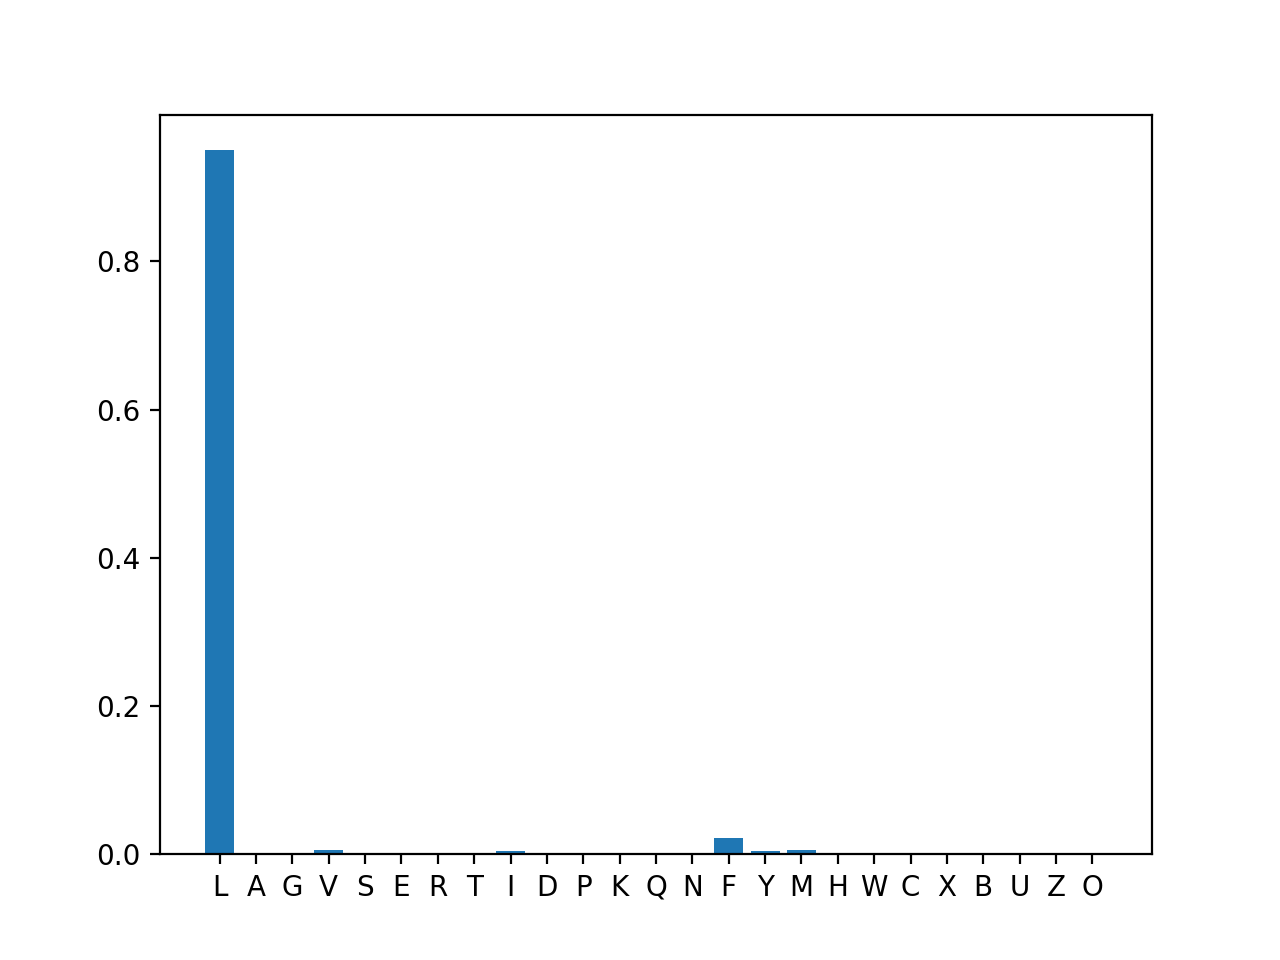

In [ ]:
masked_logits = masked_lm_model(**tokenizer(masked_insulin_sequence, return_tensors='pt')).logits
masked_logits = masked_logits[0, 30]  # Tokenizer adds <cls> to start so we add 1.
# Remove the special tokens and apply softmax to convert logits to probabilities.
probs = jax.nn.softmax(masked_logits.detach().numpy())[4:29]
letters = [k for k,_ in vocab_to_index.items()][4:29]
plt.bar(letters, probs)

In this case, the model correctly predicts that the missing amino acid is Leucine (L).

However, sometimes the model is incorrect. In this example we mask the Asparagine (N) at position 26 (index 27 as the `<cls>` token gets added at the start of the sequence.)

In [ ]:
# Masking the N in the 26th position
masked_insulin_sequence = (
    #MALWMRLLPLLALLALWGPDPAAAFV  N   QHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGG
    'MALWMRLLPLLALLALWGPDPAAAFV<mask>QHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGG'
    'GPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'
)
masked_inputs = tokenizer(masked_insulin_sequence)
masked_ids = masked_inputs['input_ids']
# Note, the tokenizer adds a <cls> token to the start of the protein sequence
# and a <eos> token at the end.
assert masked_ids[27] == vocab_to_index['<mask>']
masked_ids[27]

32

<BarContainer object of 25 artists>

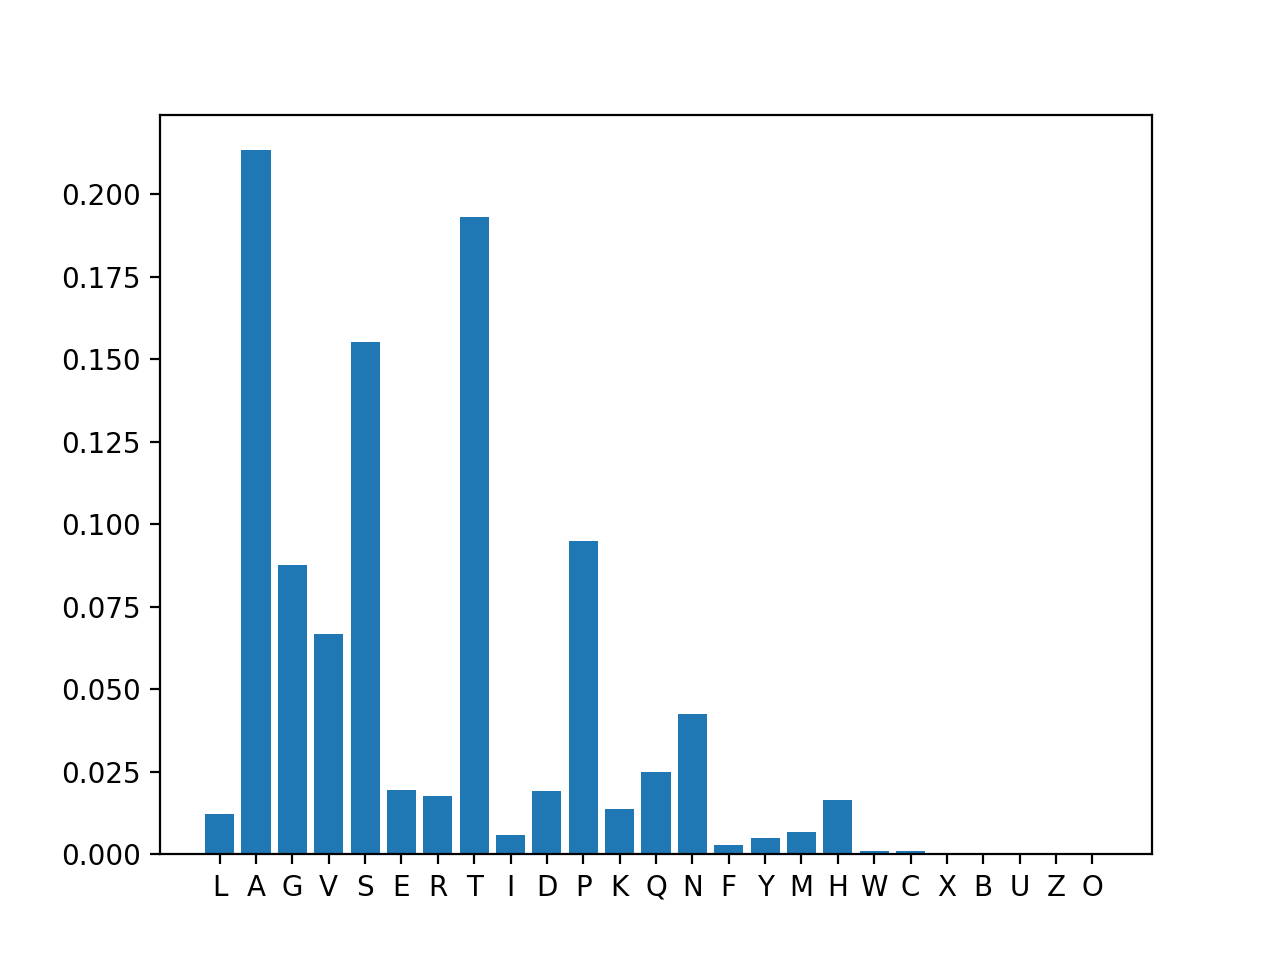

In [ ]:
masked_logits = masked_lm_model(**tokenizer(masked_insulin_sequence, return_tensors='pt')).logits
masked_logits = masked_logits[0, 27]  # Tokenizer adds <cls> to start
# Remove the special tokens and apply softmax to convert logits to probabilities.
probs = jax.nn.softmax(masked_logits.detach().numpy())[4:29]
letters = [k for k,_ in vocab_to_index.items()][4:29]
plt.bar(letters, probs)

In this case, the missing amino acid is likely ambiguous, similarly to how in the sentence, "The `____` fox jumped over the lazy dog.", has a lot of possible correct answers, e.g. big, brown, fast, quick, etc. Those are all valid words to fill in the blank. This would make it hard for the model to chose one correct word.

## 3.2 MLMs versus Next Token Prediction

Note, there is an alternative to MLMs that train the model to predict the next word (token) in a sentence. This is how GPT style models are trained. This has the model predict every possible next work in a sentence.

As an example, the model would see the following task:

* "`_____`".
* "The `_____`".
* "The child `_____`".
* "The child hit `_____`".
* "The child hit the `_____`".
* "The child hit the ball  `_____`".
* "The child hit the ball with `_____`".
* "The child hit the ball with the `_____`".

These are also fill in the blank questions but the blank is always at the end.

These models are out of the scope of this practical.

# 4. Using the outputs of the model
The output of the ESM model is updated embeddings, with the same dimensions and sequence length as the input, with encoded information about the specific protein and each amino acid.

In [ ]:
output = model(**tokenizer(insulin_sequence, return_tensors='pt'))
print(f'Protein sequence length: {len(insulin_sequence)}')
print(f'Model output shape: {output.last_hidden_state.shape}')

Protein sequence length: 110
Model output shape: torch.Size([1, 112, 640])


The shapes of each dimension and meaning is:
*   `1` - Batch Size
*   `112` - `<cls>` + 110 amino acids + `<eos>`
*   `640` - Embedding size of the model and matches the size of our input embeddings

Notice that the output length will change based on the length of the protein sequence. Often, we want to make predictions about the entire proteins. We can summarize proteins of various lengths by averaging the embeddings along the sequence.

As an example, we can visualize the average embeddings of proteins which either belong inside the cellular fluid (cytosolic) or are stuck in the membrane of the protein.

In [ ]:
cytosolic_sequences = [
 'MSLRKQTPSDFLKQIIGRPVVVKLNSGVDYRGVLACLDGYMNIALEQTEEYVNGQLKNKYGDAFIRGNNVLYISTQKRRM',
 'MAARALCMLGLVLALLSSSSAEEYVGLSANQCAVPAKDRVDCGYPHVTPKECNNRGCCFDSRIPGVPWCFKPLQEAECTF',
 'MNREGAPGKSPEEMYIQQKVRVLLMLRKMGSNLTASEEEFLRTYAGVVNSQLSQLPPHSIDQGAEDVVMAFSRSETEDRRQ',
 'MPLSDWCCGICEEAPLGRAYTQTWMETGCGPHGVTALGQQELKDCLRARSGGTASSVDWIMEAARGSLNVHNCLIKFGRRD',
 'MATFPPATSAPQQPPGPEDEDSSLDESDLYSLAHSYLGGGGRKGRTKREAAANTNRPSPGGHERKLVTKLQNSERKKRGARR',
 'MASSSGAGAAAAAAAANLNAVRETMDVLLEISRILNTGLDMETLSICVRLCEQGINPEALSSVIKELRKATEALKAAENMTS',
 'MAVFHDEVEIEDFQYDEDSETYFYPCPCGDNFSITKEDLENGEDVATCPSCSLIIKVIYDKDQFVCGETVPAPSANKELVKC',
 'MQNDAGEFVDLYVPRKCSASNRIIGAKDHASIQMNVAEVDKVTGRFNGQFKTYAICGAIRRMGESDDSILRLAKADGIVSKNF',
 'MSGPNGDLGMPVEAGAEGEEDGFGEAEYAAINSMLDQINSCLDHLEEKNDHLHARLQELLESNRQTRLEFQQQLGEAPSDASP',
 'MALSVLRLALLLLAVTFAASLIPQFGLFSKYRTPNCSQYRLPGCPRHFNPVCGSDMSTYANECTLCMKIREGGHNIKIIRNGPC']

membrane_sequences = [
 'MGRAMVARLGLGLLLLALLLPTQIYSSETTTGTSSNSSQSTSNSGLAPNPTNATTKAAGGALQSTASLFVVSLSLLHLYS',
 'MATPTQTPTKAPEEPDPFYYDYNTVQTVGMTLATILFLLGILIVISKKVKCRKADSRSESPTCKSCKSELPSSAPGGGGV',
 'MKYPLMPLVNDLTFSFLVFWFCLPVGLLLLLIIWLRFLLSQDSEENDSSVCLDWEPWSKGPAEFCWKGTLHGQEKERPCW',
 'MAYHGLTVPLIVMSVFWGFVGFLVPWFIPKGPNRGVIITMLVTCSVCCYLFWLIAILAQLNPLFGPQLKNETIWYLKYHWP',
 'MDGGQPIPSSLVPLGNESADSSMSLEQKMTFVFVILLFIFLGILIVRCFRILLDPYRSMPTSTWADGLEGLEKGQFDHALA',
 'MSSTYCGNSSAKMSVNEVSAFSLTLEQKTGFAFVGILCIFLGLLIIRCFKILLDPYSSMPSSTWEDEVEEFDKGTFEYALA',
 'MSATWTLSPEPLPPSTGPPVGAGLDAEQRTVFAFVLCLLVVLVLLMVRCVRILLDPYSRMPASSWTDHKEALERGQFDYALV',
 'MAVSTEELEATVQEVLGRLKSHQFFQSTWDTVAFIVFLTFMGTVLLLLLLVVAHCCCCSSPGPRRESPRKERPKGVDNLALEP',
 'MEALGSGHYVGGSIRSMAAAALSGLAVRLSRPQGTRGSYGAFCKTLTRTLLTFFDLAWRLRKNFFYFYILASVILNVHLQVYI',
 'MDLSFMAAQLPMMGGAFMDSPNEDFSTEYSLFNSSANVHAAANGQGQPEDPPRSSNDAVLLWIAIIATLGNIVVVGVVYAFTF']

We'll extract the embeddings for each sequence and then average along the sequence length.

In [ ]:
def sequence_embeddings(sequences, device='cpu'):
  model_inputs = tokenizer(sequences,padding=True, return_tensors='pt')
  model_inputs = {k:v.to(device) for k,v in model_inputs.items()}
  outputs = model(**model_inputs)
  embeddings = outputs.last_hidden_state.detach().cpu().numpy()
  seq_len = model_inputs['attention_mask'].cpu().sum(axis=-1, keepdims=True)
  return np.sum(embeddings, axis=1) / seq_len  # Along sequence dimension.

In [ ]:
cytosolic_embeddings = sequence_embeddings(cytosolic_sequences)
membrane_embeddings = sequence_embeddings(membrane_sequences)
combined_embeddings = np.concatenate([cytosolic_embeddings, membrane_embeddings], axis=0)

In [ ]:
combined_embeddings.shape

(20, 640)

Notice that even though the lengths of the proteins are different, the averaged embeddings are all the same length.

This makes it easy to then feed into downstream classifeirs that require a fixed feature length e.g. Random Forest or a simple Multilayer Perceptron.

In [ ]:
embeddings_tsne = TSNE(n_components=2, learning_rate='auto',
                       init='random', random_state=123, perplexity=3).fit_transform(combined_embeddings)
embeddings_tsne_df = pd.DataFrame(
    embeddings_tsne, columns=['first_dim', 'second_dim'])
embeddings_tsne_df['type'] = [0] * len(cytosolic_sequences) + [1] * len(membrane_sequences)

In [ ]:
fig = (gg.ggplot(
    mapping=gg.aes(x='first_dim', y='second_dim', fill='type'),
    data=embeddings_tsne_df)
  + gg.geom_point(size=4, alpha=0.9)
  + gg.theme(figure_size=(7, 4))
)
fig.draw();

As you can see, there is some nice clustering of the different protein types.

# 5. Training a model

In this section we will use the embeddings to train a simple model using the amino acid embeddings used previously.

<!-- !['Paths to Follow'](https://assets.stickpng.com/images/580b57fbd9996e24bc43bce5.png) -->
<img src="https://assets.stickpng.com/images/580b57fbd9996e24bc43bce5.png"  width="60%">



As an example task, we will be taking a look at Snake Antivenom Binding.
Snake bites cause more than 100,000 deaths and more than 300,000 permanent disfigurements every year, caused by toxin proteins in snake venom.

_Note: If you're not interested in the biology, skip to the **TL;DR** below!_

Currently, the only effective treatment against snakebite envenoming consists of unspecified cocktails of polyclonal antibodies. These antivenom antibodies work unreliably across different species of snake, and until recently little data existed on which of the 2000+ snake venom toxins they bind, as well as where the binding of the antibody to the toxin occurs.

To address this issue, a recent study used high-density peptide microarray (HDPM) technology with all currently available African snake toxin protein sequences, together with eight commercial antivenoms in clinical use in Africa to better understand how antivenoms bind to specific snake venom toxins.

We will use the dataset from this study, which measures how cross-reactive the eight snake antivenoms are and where in the toxin sequence the antibodies they bind to the toxin (epitope).

!['Paths to Follow'](https://i.ibb.co/sgtcN4v/ml-for-bio-02-720.png)

**TL;DR: I'm not a biologist!**
- Input: In this task we will have a 16-length sequence of amino acids\
  Example: `NLYQFKNMIQCTVPNR`
- Target: We will be predicting a scalar value `Signal`\
  Example: -0.53
- We will do this for each type of `Antivenom`.


The specific dataset we will use originates from the [African Snake Antivenom Binding Challenge](https://zindi.africa/competitions/umojahack-africa-2022-advanced-challenge) hosted on [Zindi](https://zindi.africa/).

## 5.1 Loading the data



Reading in the data with Pandas

In [ ]:
data_df = pd.read_csv("https://storage.googleapis.com/umojahack2022/train.csv")
data_df.head(5)

,ID,Toxin_UniprotID,Kmer_Position_start,Kmer_Position_end,Antivenom,Toxin_Kmer,Signal,Genus,Species,ProteinFam,ProteinSubFam,ProteinSubSubFam
0,P07037_Bioclone_1,P07037,1,16,Bioclone,NLYQFKNMIQCTVPNR,-0.53,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
1,P07037_Bioclone_2,P07037,2,17,Bioclone,LYQFKNMIQCTVPNRS,-1.00,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
2,P07037_Bioclone_3,P07037,3,18,Bioclone,YQFKNMIQCTVPNRSW,-0.21,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
3,P07037_Bioclone_4,P07037,4,19,Bioclone,QFKNMIQCTVPNRSWW,-0.30,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
4,P07037_Bioclone_5,P07037,5,20,Bioclone,FKNMIQCTVPNRSWWH,-1.00,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily


Each row in the dataset represents a k-mer (16 amino acid sequence within the toxin) and it has a signal column coming from the high-density peptide microarray experiment. With this, we will predict signal column generated by a given `Toxin_K_mer` and `Antivenom`.

Note: A K-mer is a subsequence of a full protein consisting of `K` sequential amino acids

## 5.2 Splitting and preprocessing

First lets split the data into a training and validation split. To prevent data leakage between our training and validation sets, we will split on unique toxins.

In [ ]:
unique_toxins = data_df['Toxin_UniprotID'].unique()
print(f"There are {unique_toxins.shape[0]} unique toxins")

There are 237 unique toxins


Lets randomly select ~10% of the toxins for validation

**Code task:** Create a training-validation split using the `unique_toxins` calculated above.

_hint: Use sklearn's `train_test_split` ([see usage here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))_

In [ ]:
from sklearn.model_selection import train_test_split
train_toxins, valid_toxins = ... # YOUR CODE GOES HERE

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

from sklearn.model_selection import train_test_split
train_toxins, valid_toxins = train_test_split(unique_toxins, test_size=0.1)

In [ ]:
print(f"Train has {train_toxins.shape[0]} toxins, validation has {valid_toxins.shape[0]} toxins")

Train has 213 toxins, validation has 24 toxins


We can now find the full training and validation dataframes

In [ ]:
train_df = data_df[data_df["Toxin_UniprotID"].isin(train_toxins)]
valid_df = data_df[data_df["Toxin_UniprotID"].isin(valid_toxins)]
print(f"train_df has {train_df.shape[0]} rows, valid_df has {valid_df.shape[0]} rows")

train_df has 112170 rows, valid_df has 11947 rows


We will now convert the data to a format that [flax](https://flax.readthedocs.io/en/latest/) and [Jax](https://jax.readthedocs.io/en/latest/) can understand. This means we need to:
1. Extract the amino acid embeddings
2. Encode the antivenom strings (i.e. create an Antivenom vocabulary)
3. Extract the signal column

Let's first get all the mean embeddings per toxin K-mer, to do this, we will use the `sequence_embeddings()` function from Section 4. Recall: the `sequence_embeddings()` function takes in a string of amino acids, and returns the mean-pooled embedding.

To speed things up, we will calculate the embeddings on the GPU if available.

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
model = model.eval()
device

'cuda'

We first create a dictionary that maps unique toxin K-mers to their mean-pooled embedding. This `kmer_embedding` dict can then be looked up later when formatting the input data

In [ ]:
# This cell can take 5~10 minutes on colab with a GPU
from tqdm.notebook import tqdm

k_mers = data_df['Toxin_Kmer'].unique()
print(f"There are {k_mers.shape[0]} unique k-mers")

kmer_embedding = {}

with torch.no_grad():
    for k_mer in tqdm(k_mers, total=len(k_mers)):
        kmer_embedding[k_mer] = sequence_embeddings(k_mer, device=device).numpy()[0]

There are 11954 unique k-mers


  0%|          | 0/11954 [00:00<?, ?it/s]

In [ ]:
# try clear some GPU memory
model = model.to('cpu')
torch.cuda.empty_cache()

We now convert everything into a nice and easy to use tensorflow dataset

In [ ]:
# Uses embeddings
vocab = set("".join(data_df['Toxin_Kmer']))
aa_to_idx = {aa:i for i,aa in enumerate(vocab)}
av_to_idx = {av:i for i,av in enumerate(data_df['Antivenom'].unique())}


def convert_to_tfds(df):
    k_mers, antivenoms, targets = [], [], []
    for _,row in tqdm(df.iterrows(), total=len(df)):
        k_mer = kmer_embedding[row['Toxin_Kmer']]
        k_mers.append(k_mer)

        antivenoms.append(av_to_idx[row['Antivenom']])
        targets.append(row['Signal'])
    ds = tf.data.Dataset.from_tensor_slices({"sequence": np.stack(k_mers), "antivenom": np.array(antivenoms), "target": np.array(targets)})
    return ds

In [ ]:
train_ds = convert_to_tfds(train_df)
valid_ds = convert_to_tfds(valid_df)

100%|██████████| 11947/11947 [00:00<00:00, 21999.17it/s]


In [ ]:
BATCH_SIZE=128

train_ds = train_ds.shuffle(1024)
train_ds = train_ds.batch(BATCH_SIZE)
valid_ds = valid_ds.batch(BATCH_SIZE)

In [ ]:
batch = next(iter(train_ds))
batch['sequence'].shape, batch['antivenom'].shape, batch['target'].shape

(TensorShape([128, 640]), TensorShape([128]), TensorShape([128]))

## 5.3 Creating a simple MLP

We will now train a simple [flax](https://flax.readthedocs.io/en/latest/) model using  using the amino acid embeddings.

The model will have two inputs, the mean amino acid embedding and the `antivenom` to be scored. For the `antivenom` we can use an `nn.Embed` layer with a vocabulary size of 8.

We concatenate the mean amino acid embedding with the `antivenom` embedding and pass it through a simple MLP. Feel free to make adjustments to the model to try improve performance!

In [ ]:
class Model(nn.Module):
    dim: int = 128
    av_vocab_size: int = 8

    @nn.compact
    def __call__(self, batch):
        x = nn.Embed(self.av_vocab_size, self.dim)(batch['antivenom'])

        x = jnp.concatenate([batch['sequence'], x], axis=1)

        x = nn.Sequential(
            [
                nn.Dense(self.dim*2),
                jax.nn.gelu,
                nn.Dense(self.dim),
                jax.nn.gelu,
                nn.Dense(1),
            ]
        )(x)

        return x

In [ ]:
av_model = Model(dim=256, av_vocab_size=len(av_to_idx))

## 5.4 Training loop

With all the model and data set up, we can now train the model

In [ ]:
LR = 0.01

init_rng = jax.random.PRNGKey(42)
dummy_batch = jax.tree_util.tree_map(jnp.array, batch)
variables = av_model.init(
  init_rng,
  dummy_batch # <== inputs
)
params = variables["params"]

optimiser = optax.adam(LR)
opt_state = optimiser.init(params)

**Code task:** Complete the following training code
- Add the MSE loss calculation
- Update the model parameters with optax

In [ ]:
@jax.jit
def train_step(params, opt_state, batch):
    def loss_fn(params):
        preds = av_model.apply(
            {'params': params},
            batch # <== inputs
        )
        loss = ... # YOUR CODE GOES HERE
        return loss

    loss, grads = jax.value_and_grad(loss_fn)(params)
    # YOUR CODE GOES HERE
    # Hint: Refer to optax docs if you need help!

    return params, opt_state, loss

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

@jax.jit
def train_step(params, opt_state, batch):

    @jax.jit
    def loss_fn(params):
        preds = av_model.apply(
            {'params': params},
            batch # <== inputs
        )
        loss = jnp.power(batch['target'] - preds.squeeze(), 2).mean()
        return loss

    loss, grads = jax.value_and_grad(loss_fn)(params)
    updates, opt_state = optimiser.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

    return params, opt_state, loss

In [ ]:
%%time
from tqdm import tqdm

EPOCHS = 10
key = jax.random.PRNGKey(42)

for epoch in range(EPOCHS):
    running_loss = None
    pbar = tqdm(enumerate(train_ds), total=len(train_ds))
    for i, batch in pbar:
        batch = jax.tree_util.tree_map(jnp.array, batch)

        params, opt_state, loss = train_step(params, opt_state, batch)

        if running_loss is None:
            running_loss = loss.item()
        else:
            running_loss = 0.99 * running_loss + (1 - 0.99) * loss

        pbar.set_postfix({'loss': running_loss})


    valid_losses = []
    for i, batch in tqdm(enumerate(valid_ds), total=len(valid_ds)):
        batch = jax.tree_util.tree_map(jnp.array, batch)

        preds = av_model.apply(
            {'params': params},
            batch # <== inputs
        )
        loss = jnp.power(batch['target'] - preds, 2).mean()

        valid_losses.append(loss)

    valid_loss = np.mean(valid_losses)

    print(f"[Epoch {epoch}]: Valid loss={valid_loss:.3f}, Train loss={running_loss:.3f}\n")

100%|██████████| 94/94 [00:06<00:00, 15.63it/s]


[Epoch 0]: Valid loss=1.464, Train loss=0.636



100%|██████████| 94/94 [00:02<00:00, 36.96it/s]


[Epoch 1]: Valid loss=1.388, Train loss=0.547



100%|██████████| 94/94 [00:02<00:00, 34.53it/s]


[Epoch 2]: Valid loss=1.647, Train loss=0.513



100%|██████████| 94/94 [00:02<00:00, 32.36it/s]


[Epoch 3]: Valid loss=1.385, Train loss=0.504



100%|██████████| 94/94 [00:02<00:00, 36.68it/s]


[Epoch 4]: Valid loss=1.470, Train loss=0.480



100%|██████████| 94/94 [00:02<00:00, 36.06it/s]


[Epoch 5]: Valid loss=1.597, Train loss=0.463



100%|██████████| 94/94 [00:03<00:00, 25.97it/s]


[Epoch 6]: Valid loss=1.605, Train loss=0.459



100%|██████████| 94/94 [00:03<00:00, 28.73it/s]


[Epoch 7]: Valid loss=1.610, Train loss=0.449



100%|██████████| 94/94 [00:02<00:00, 36.54it/s]


[Epoch 8]: Valid loss=1.433, Train loss=0.443



100%|██████████| 94/94 [00:02<00:00, 36.50it/s]

[Epoch 9]: Valid loss=1.456, Train loss=0.435

CPU times: user 2min 26s, sys: 8.6 s, total: 2min 35s
Wall time: 3min 3s


And we're done! We've implemented a simple MLP model that utilises the rich information provided by the pre-trained protein language model.

## 5.4 Final challenge

**Coding Task:**

While the model is learning, it is in no way optimal. Could you create a model that improves the MSE loss?

- One idea is to use some sort of RNN (such as an LSTM) or Conv net on the amino-acid embeddings, rather than mean-pooling them! You lose a lot of information by mean-pooling, but the trade-off is it becomes expensive to compute large sequence lengths.
  - For RNNs, check the documentation [here](https://flax.readthedocs.io/en/latest/api_reference/flax.linen/_autosummary/flax.linen.RNN.html)
  - For Convolutional networks, check the documentation [here](https://flax.readthedocs.io/en/latest/api_reference/flax.linen/_autosummary/flax.linen.Conv.html)
  - **Note:** You may have to modify the code that extracts embeddings in order to retain the sequence dimension!
- Another idea is to include the other metadata, such as Species and Protein Family.
  - For these it's recommended to use `nn.Embed`!

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/Cg9aoa7czoZCYqxF7",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />